## Classification model using Naive Bayes for salary data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary = pd.read_csv('SalaryData_Train.csv')
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Exploratory data analysis

In [3]:
salary.shape

(30161, 14)

In [4]:
salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [5]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='capitalloss'>

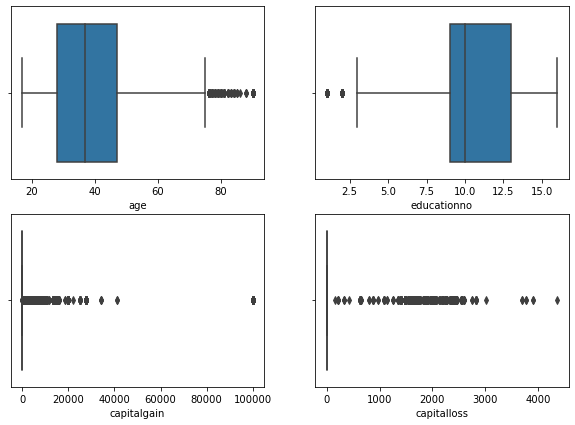

In [6]:
fig,ax = plt.subplots(figsize=(10,7),nrows=2,ncols=2)
sns.boxplot(salary['age'], ax=ax[0][0])
sns.boxplot(salary['educationno'], ax=ax[0][1])
sns.boxplot(salary['capitalgain'], ax=ax[1][0])
sns.boxplot(salary['capitalloss'], ax=ax[1][1])

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

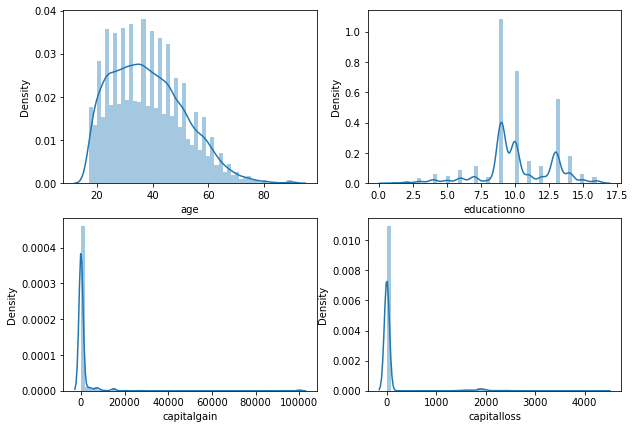

In [7]:
fig,ax = plt.subplots(figsize=(10,7),nrows=2,ncols=2)
sns.distplot(salary['age'],kde = True, ax=ax[0][0])
sns.distplot(salary['educationno'],kde = True, ax=ax[0][1])
sns.distplot(salary['capitalgain'],kde = True, ax=ax[1][0])
sns.distplot(salary['capitalloss'],kde= True, ax=ax[1][1])


In [8]:
salary.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [9]:
salary.info()  ## No null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
salary.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [11]:
salary1 = salary.copy()

In [13]:
x = salary1.iloc[:,:13]
y = salary1.Salary
x.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [14]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(y)
label1 = le.fit_transform(salary1.sex)
y = label
salary1['sex'] = label1

In [18]:
x = pd.get_dummies(x)
x.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
print(salary.workclass.value_counts())
print(salary.age.value_counts())
print(salary.education.value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


<AxesSubplot:xlabel='education', ylabel='count'>

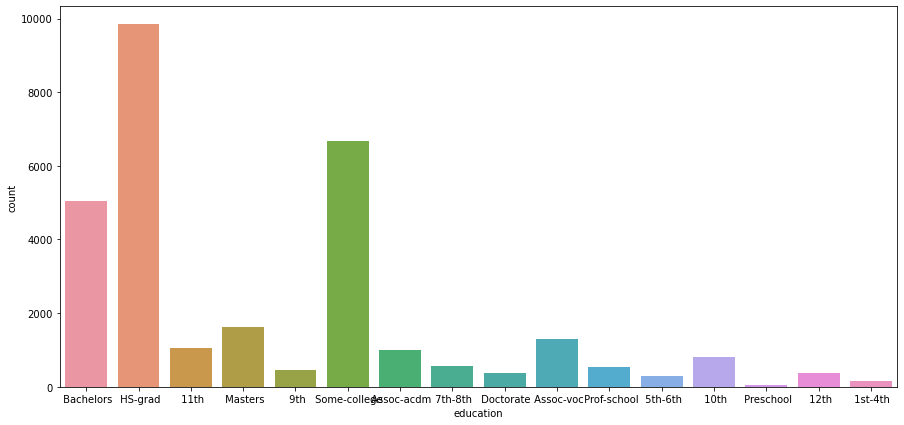

In [20]:
figure = plt.subplots(figsize=(15,7))
sns.countplot(salary.education)

<AxesSubplot:xlabel='workclass', ylabel='count'>

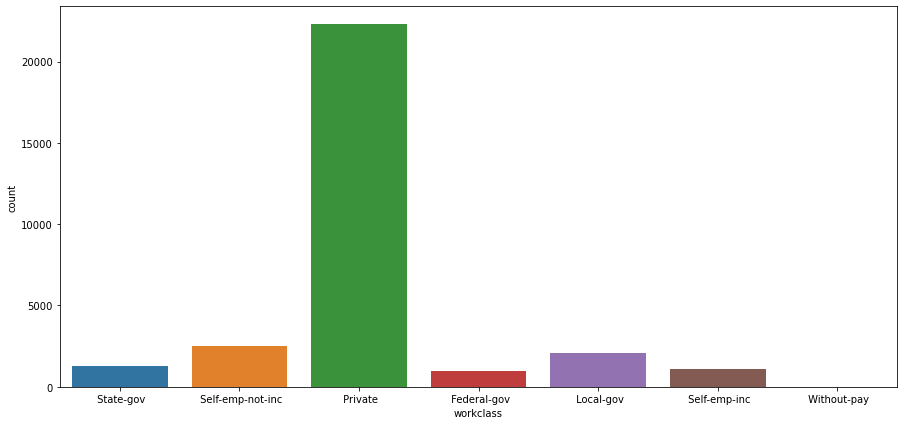

In [21]:
figure = plt.subplots(figsize=(15,7))
sns.countplot(salary.workclass)

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

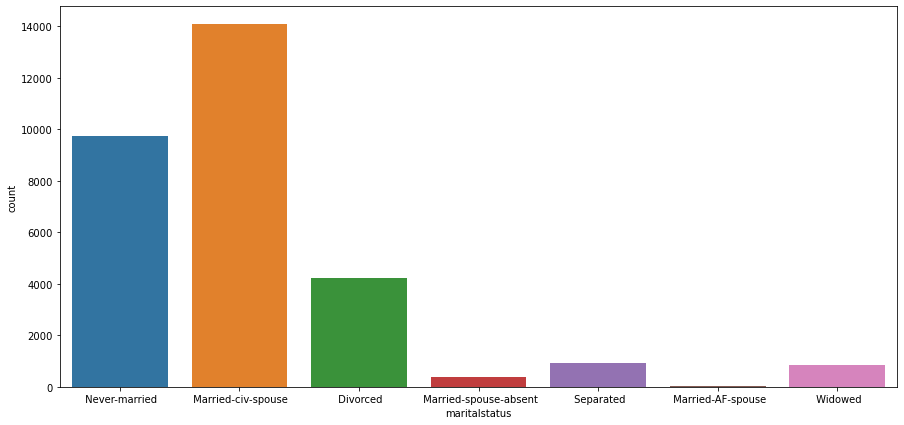

In [22]:
figure = plt.subplots(figsize=(15,7))
sns.countplot(salary.maritalstatus)

<AxesSubplot:xlabel='occupation', ylabel='count'>

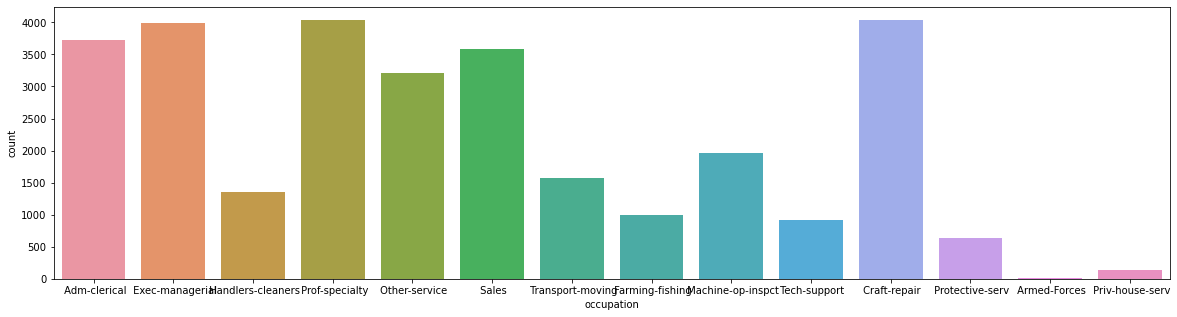

In [23]:
figure = plt.subplots(figsize=(20,5))
sns.countplot(salary.occupation)

<AxesSubplot:xlabel='race', ylabel='count'>

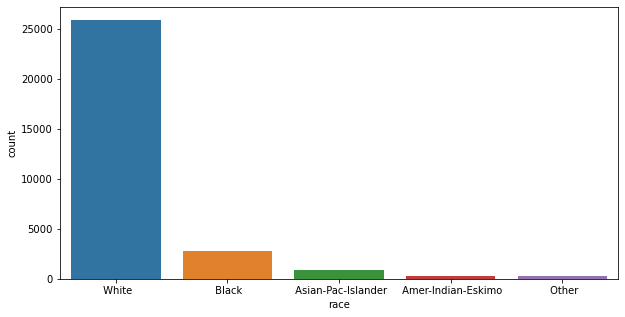

In [24]:
figure = plt.subplots(figsize=(10,5))
sns.countplot(salary.race)

<AxesSubplot:xlabel='relationship', ylabel='count'>

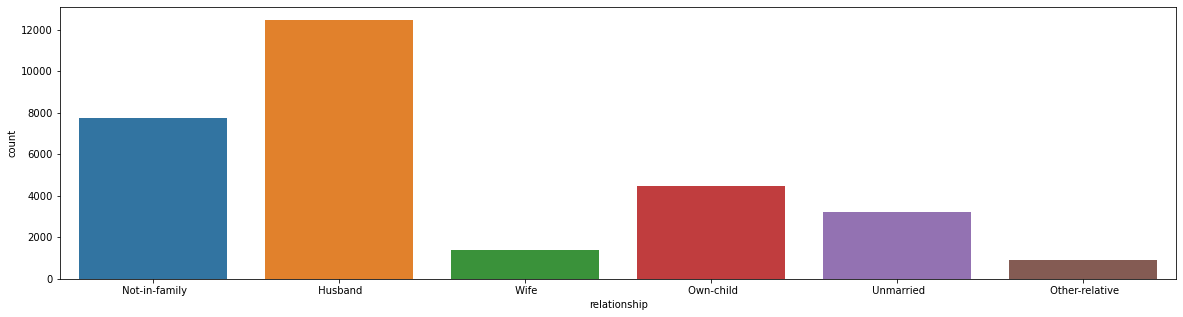

In [25]:
figure = plt.subplots(figsize=(20,5))
sns.countplot(salary.relationship)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 100)
(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)


((21112, 102), (9049, 102), (21112,), (9049,))

In [31]:
xtrain = pd.get_dummies(xtrain)
xtest = pd.get_dummies(xtest)

In [32]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((21112, 102), (21112,), (9049, 102), (9049,))

In [33]:
## Building Naive Bayes Classification model
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()
gnb
# fit the model
gnb.fit(xtrain, ytrain)

GaussianNB()

In [34]:
y_pred = gnb.predict(xtest)

y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
y_pred_train = gnb.predict(xtrain)

y_pred_train

In [128]:
## Calculating accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, y_pred)))

Model accuracy score: 0.8076


In [135]:
print('Training data accuracy score: {0:0.4f}'. format(accuracy_score(ytrain, y_pred_train)))

Training data accuracy score: 0.8062


In [138]:
## From this accuracy scores we can say our model is right fit since both train and test accuracies are comparably same

In [131]:
ydf = pd.DataFrame(y_pred)
ydf.value_counts()

 <=50K    5936
 >50K     3113
dtype: int64

In [132]:
salary1.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print(cm)

[[5491 1296]
 [ 445 1817]]


In [137]:
cm_train = confusion_matrix(ytrain, y_pred_train)
print(cm_train)

[[12759  3107]
 [  985  4261]]
